In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
netflix = pd.read_csv("/content/netflix_dataset.csv (1).zip")
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
#To find number of unique values in each column
dict = {}
for i in list(netflix.columns):
    dict[i] = netflix[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["Unique counts"]).transpose())

              Unique counts
show_id                7787
type                      2
title                  7787
director               4049
cast                   6831
country                 681
date_added             1565
release_year             73
rating                   14
duration                216
listed_in               492
description            7769


In [6]:
#To find number of missing values in each column
temp = netflix.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Missing values': temp.values})
uniq

Columns  Missing values
0        show_id               0
1           type               0
2          title               0
3       director            2389
4           cast             718
5        country             506
6     date_added              10
7   release_year               0
8         rating               7
9       duration               0
10     listed_in               0
11   description               0

Graph showing number of TV SHOWS and MOVIES in dataset.

Text(0.5, 1.0, 'Movies v/s TV shows')

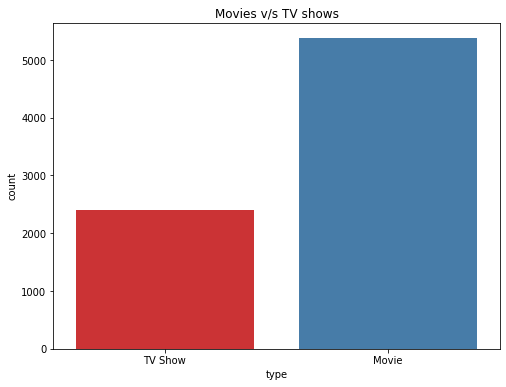

In [7]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = netflix,palette="Set1")
ax.set_title("Movies v/s TV shows")

In [8]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

In [9]:
netflix_date= netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

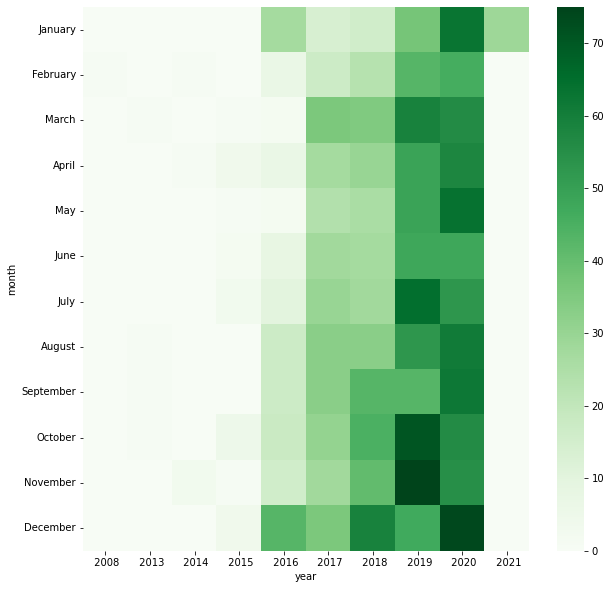

In [10]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.subplots(figsize=(10,10))
sns.heatmap(df,cmap='Greens')

Bar graph of each rating type. 

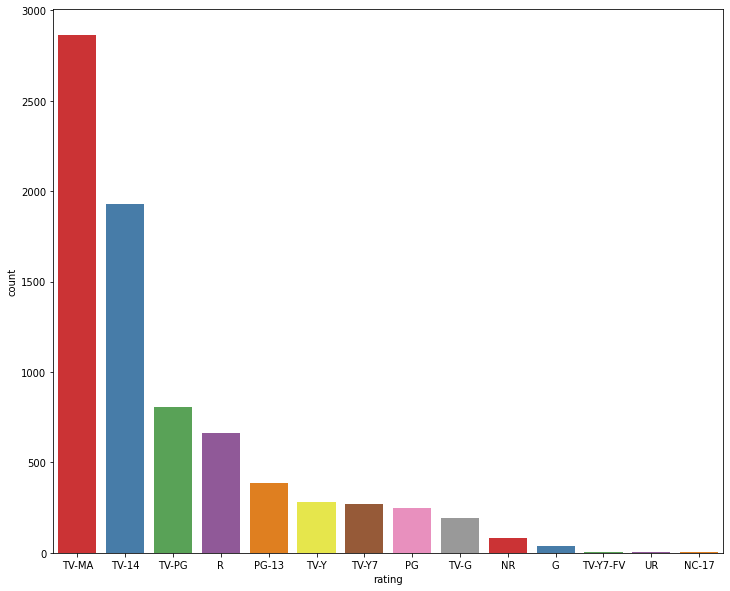

In [11]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix,palette="Set1",order=netflix['rating'].value_counts().index[0:15]) 

The majority of movies have a "TV-MA" classification. This classification applies to a television program that is solely intended for adults.

The second-largest category is "TV-14," which denotes material that may not be suitable for viewers under the age of 14.

Content Based Recommendations  : Based on the plot summaries for each film, we will compute pairwise similarity scores and make recommendations for films. The description feature of our dataset includes a plot description.

In [12]:
netflix['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

The TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it appears. This is done in order to lessen the weight given to terms that often appear in plot summaries and, as a result, their significance in determining the final similarity score.

If you're wondering what term frequency (TF) is, it's the proportion of times a word appears in a text over all instances. The inverse document frequency (IDF), which is expressed as log(number of documents/documents with term), is the proportional count of documents that include the phrase. Each word's total significance to the papers in which it appears is equal to TF * IDF.

This will provide us with a matrix where, like before, each row represents a movie and each column represents a term from the description vocabulary (all the words that exist in at least one document). By doing this, it is possible to lessen the weight given to terms that often appear in plot descriptions and, as a result, their value in determining the final similarity score.

In [13]:
#Content Based Recommedation System

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
netflix['description'] = netflix['description'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(7787, 17905)

In [14]:
#tfidf_matrix.nonzero()
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [15]:
#construct a reverse map if indices and movie titles
indices = pd.Series(netflix.index, index = netflix['title']).drop_duplicates()

The time has come for us to specify our recommendation function. We will take the following actions:-

1) Using the movie's title as guidance, find the index.

2) Obtain a list of the cosine similarity scores between that particular movie and all other films. Create a list of tuples out of it, with the first element being the location and the second being the similarity score.

3) Sort the aforementioned list of tuples using the similarity scores, which is the second component.

4) Select the top 10 items from this list. Neglect the first element since it is about you (the movie most similar to a particular movie is the movie itself).

5) Provide the names of the elements that match the top element indices.

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [17]:
get_recommendations('Black Panther')

3204                                      John Henry
7022                                      The Writer
1170                                            Cake
1628                           Daughters of the Dust
7606                           Who Killed Malcolm X?
6792                                The Pyramid Code
2304                                        Fugitiva
7189                              Transformers Prime
4406    Naruto Shippûden the Movie: The Will of Fire
2138                                        Fearless
Name: title, dtype: object

In [18]:
get_recommendations('3 Idiots')

1463                        College Romance
2005                      Engineering Girls
1197                              Candy Jar
4261                              Mr. Young
55      100 Things to do Before High School
4739                                 Pahuna
851                          Best Neighbors
777                              Be with Me
4171                            Moms at War
3790                               Lovesong
Name: title, dtype: object

Even while our system did a respectable job of locating movies with comparable narrative summaries, the suggestions' quality isn't that high. The movie "3 idiots" brings back similar-themed films (College Life). However, it fails if someone requests the same director or cast.

As a result, the model's performance should be enhanced by the addition of new metrics.

Content based filtering on multiple metrics. Content based filtering on the following factors:

- Title
- Cast
- Director
- Listed in
- Description

In [19]:
#Filling null values with empty string.
filledna=netflix.fillna('')


The names and keyword occurrences would then be changed to lowercase, and any spaces between them would be removed. This is done to prevent "Tony Stark" and "Tony Anthony" from being counted as the same Tony by our vectorizer.

In [20]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))


In [21]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [22]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

title         director                                               cast  \
0     3%                   joãomiguel,biancacomparato,michelgomes,rodolfo...   
1  07:19  jorgemichelgrau  demiánbichir,héctorbonilla,oscarserrano,azalia...   
2  23:59      gilbertchan  teddchan,stellachung,henleyhii,lawrencekoh,tom...   
3      9       shaneacker  elijahwood,johnc.reilly,jenniferconnelly,chris...   
4     21    robertluketic  jimsturgess,kevinspacey,katebosworth,aaronyoo,...   

                                           listed_in  \
0     internationaltvshows,tvdramas,tvsci-fi&fantasy   
1                         dramas,internationalmovies   
2                   horrormovies,internationalmovies   
3  action&adventure,independentmovies,sci-fi&fantasy   
4                                             dramas   

                                         description  
0  inafuturewheretheeliteinhabitanislandparadisef...  
1  afteradevastatingearthquakehitsmexicocity,trap...  
2  whenanarmyrecruitisfounddead,hisfellowsoldiers...  
3  inapostapocalypticworld,rag-dollrobotshideinfe...  
4  abrilliantgroupofstudentsbecomecard-countingex...

Here we can see all the words are joined to make a big string.

We are now in a position to create our "soup" or a "bag of words" for all rows, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).



In [23]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender.

One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [24]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])


In [25]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [26]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [27]:
get_recommendations_new('Black Panther', cosine_sim2)

2837                   How It Ends
3006                      Inkheart
5632                   Singularity
1741    Di Renjie zhi Sidatianwang
2586       Halo: The Fall of Reach
4456                          Next
6889          The Space Between Us
391            Alibaba Aur 40 Chor
1849                   Dragonheart
4080              Midnight Special
Name: title, dtype: object

In [28]:
get_recommendations_new('3 Idiots', cosine_sim2)

4872                              PK
7477               War Chhod Na Yaar
6585    The Legend of Michael Mishra
5097                 Rang De Basanti
3982                           Maska
5968                         Talaash
2571                          Haapus
2149              Ferrari Ki Sawaari
5377                           Sanju
5904                      Super Nani
Name: title, dtype: object

In [29]:
netflix_df=netflix
# Replacing the null values in director column
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

In [30]:
# Checking the null values are replaced or not
netflix_df['director'].isnull().sum()

0

In [31]:
# Replacing the null values in cast column
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

In [32]:
# Checking the null values are replaced or not
netflix_df['cast'].isnull().sum()

0

In [33]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [34]:
# Replacing the null values in country column
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Checking the null values are replaced or not
netflix_df['rating'].isnull().sum()    

0

In [35]:
# Dropping the null values of the date_added column
netflix_df.dropna(inplace=True)    

In [36]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Let's genereate new columns for our analysis

In [37]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

# Year_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

#Adding month column from 'date_added'
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()

# Droping the month_added columns
netflix_df.drop(['date_added'],axis=1,inplace=True)


Obtaining the first nation name simplifies the county-by-county analysis.

In [38]:
# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [39]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

Exploratory Data Analysis(EDA)

Analyze the type of content available on Netflix




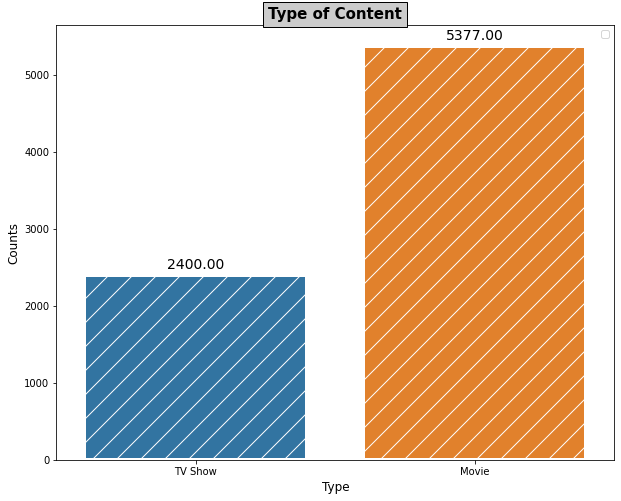

In [40]:
# Plotting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='white',
                  hatch='/')
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)
     

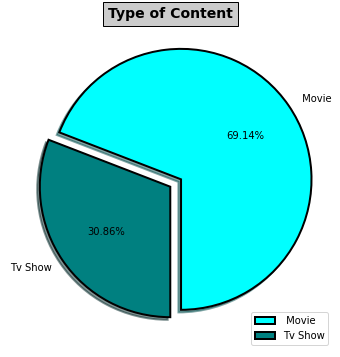

In [41]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Movie",'Tv Show']
values = netflix_df['type'].value_counts().values

# Plotting the graph
myexplode = [0.1, 0]
colors = ['aqua', 'teal']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Type of Content', bbox={'facecolor':'0.8', 'pad':5},fontsize=14, fontweight='bold')
plt.legend()
plt.show()

Observations:
It is evident that there are more movies on Netflix than TV shows.

Netflix has 6128 movies, which is more than double the quantity of TV shows.

Movie ratings analysis

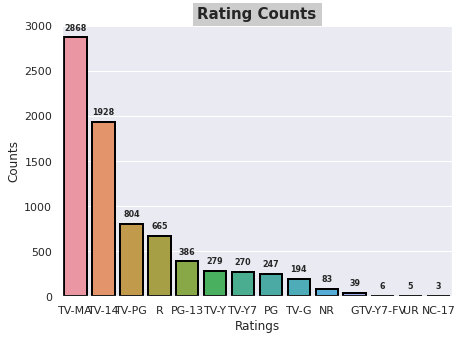

In [42]:
# Plotting the countplot for the ratings
plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=8, fontweight='bold')

In [43]:
#Creating 2 new dataframes for movies and TV shows
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

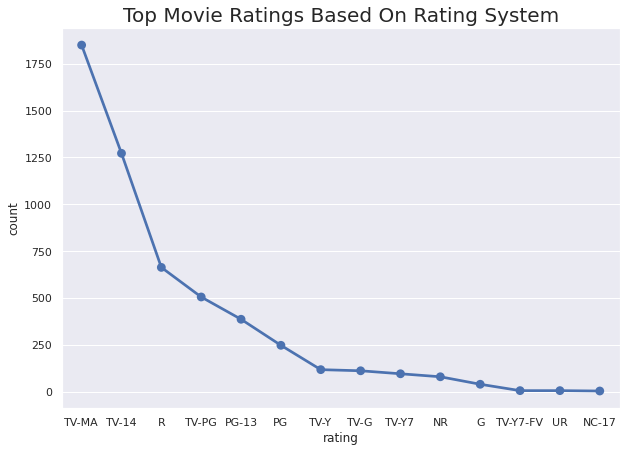

In [44]:
#Plotting the ratings on movies on pointplot
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()   

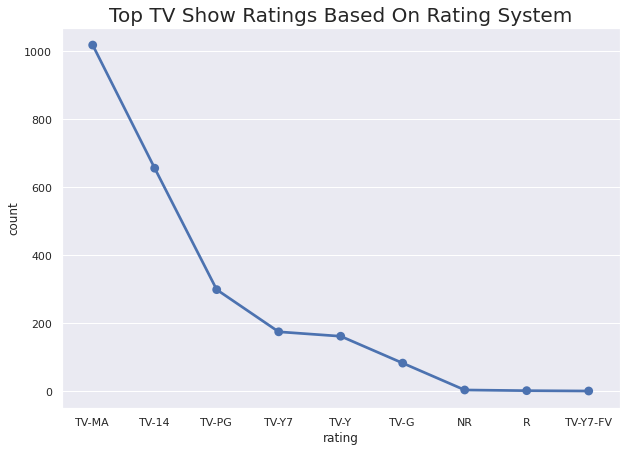

In [45]:
#Plotting the ratings on TV Shows on pointplot
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

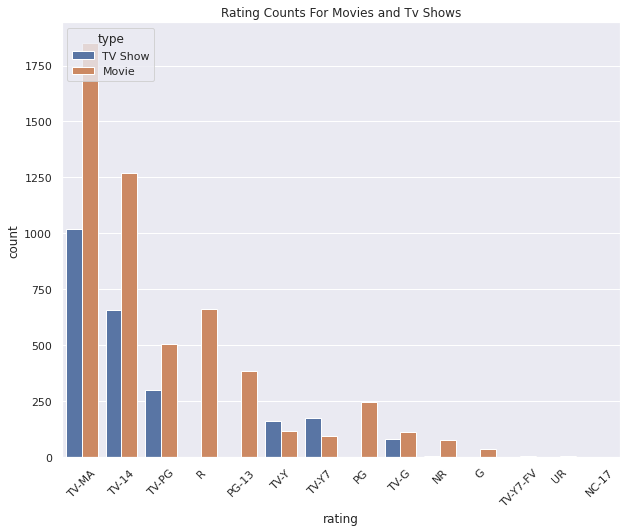

In [46]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="rating",data= netflix_df,hue= "type",order = netflix_df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()

Observations:

The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.

The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.



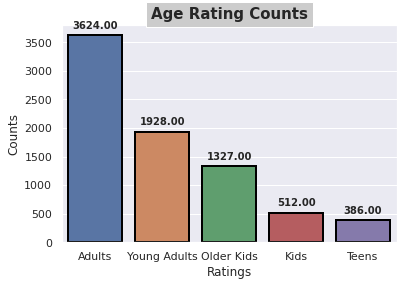

In [47]:
# Countplot for Adult, Teen, Kids, Older Kids
ax=sns.countplot('age_rating',data=netflix_df,lw=2, ec='black',order = netflix_df['age_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize=15,fontweight='bold',bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')    

Observations:
We can observe from the above count plot that the majority of Netflix material is intended for adults. There is very little content available for teens and kids.


Content Growth

Text(0.5, 0, 'Added Year')

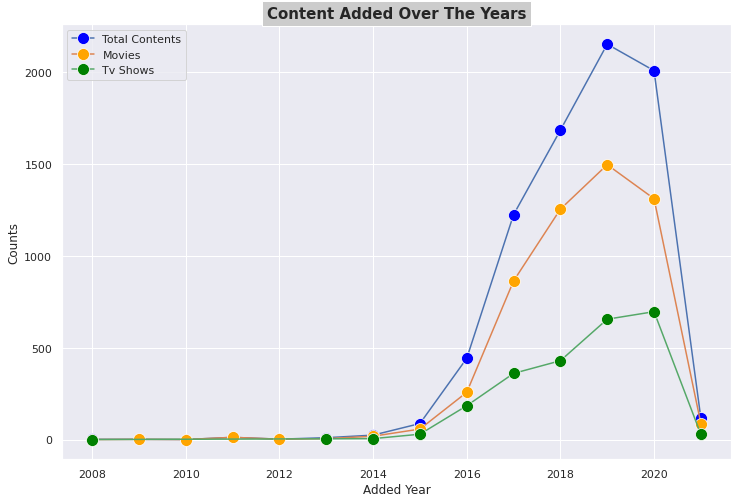

In [48]:
# Plotting the graph for the growth of contents over the netflix
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

tv = df_tv[col].value_counts().reset_index().sort_values('index')
tv = tv.rename(columns = {col : "count", "index" : col})
tv = tv.sort_values(col)

movies = df_movies[col].value_counts().reset_index().sort_values("index")
movies = movies.rename(columns = {col : "count", "index" : col})
movies = movies.sort_values(col)

total = netflix_df[col].value_counts().reset_index().sort_values("index")
total = total.rename(columns = {col : "count", "index" : col})
total = total.sort_values(col)



trace3 = sns.lineplot(x=total[col], y=total["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=movies[col], y=movies["count"], data=df_movies,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=tv[col], y=tv["count"], data=df_tv,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'green', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added Over The Years",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Year') 

Release Year Analysis

Text(0.5, 0, 'Release Year')

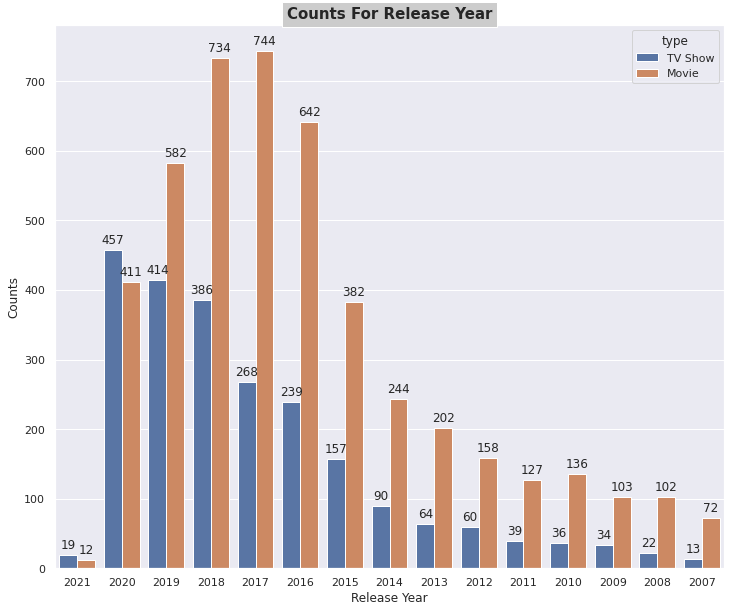

In [49]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('release_year',data=netflix_df,hue='type',order=[2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007])
# We take only those year under consideration, onwards which netflix starts streaming services.

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Release Year')   

Observations:
According to the following countplot, 767 movies were released in 2017, which is the most number of releases in any year.

According to the above countplot, there will be 436 television shows released in 2020, which is the most of any year.

Country Analysis

Text(0, 0.5, 'Country Name')

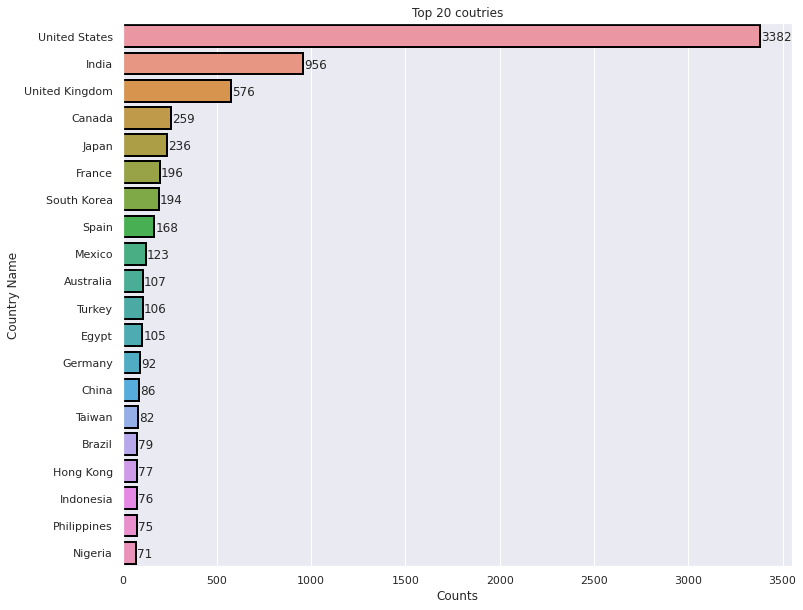

In [50]:
# Top 20 countries on Netflix
plt.figure(figsize=(12,10))
ax=sns.countplot(y='principal_country',lw=2, ec='black',data=netflix_df,order=netflix_df['principal_country'].value_counts().index[0:20])
# Adding Annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center',fontsize=12)
plt.title('Top 20 coutries')
plt.xlabel('Counts')
plt.ylabel('Country Name')

In [51]:
#Listing the top 10 nations
top = netflix_df['country'].value_counts()[0:10]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Turkey'],
      dtype='object')

Observations:
The United States is the most prolific generator of Netflix content, with India and the United Kingdom trailing far behind.


How does content differ by country in the top ten lists?

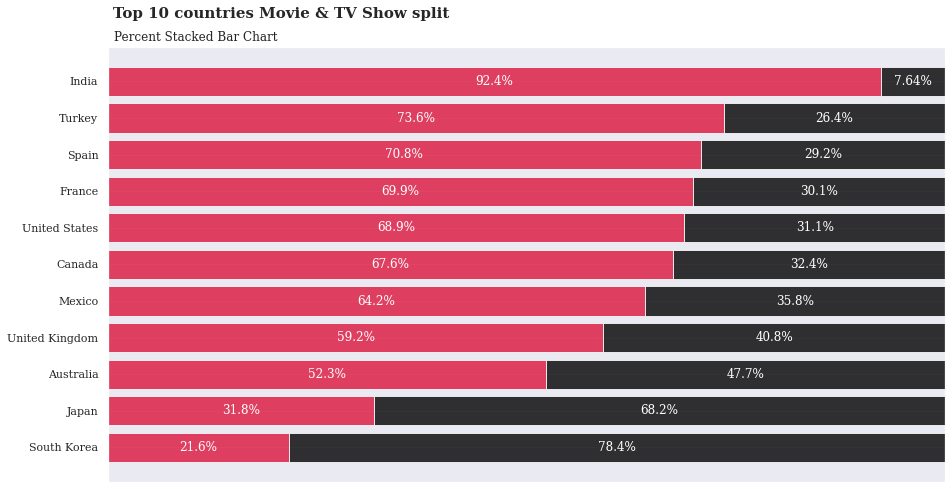

In [52]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(content_data_ratio.index, fontfamily='serif', fontsize=11)

# Addind Annotaion
for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['Movie'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')

for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]+content_data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, 
        fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   
plt.show()
     

**Analysis of Movie Genres**

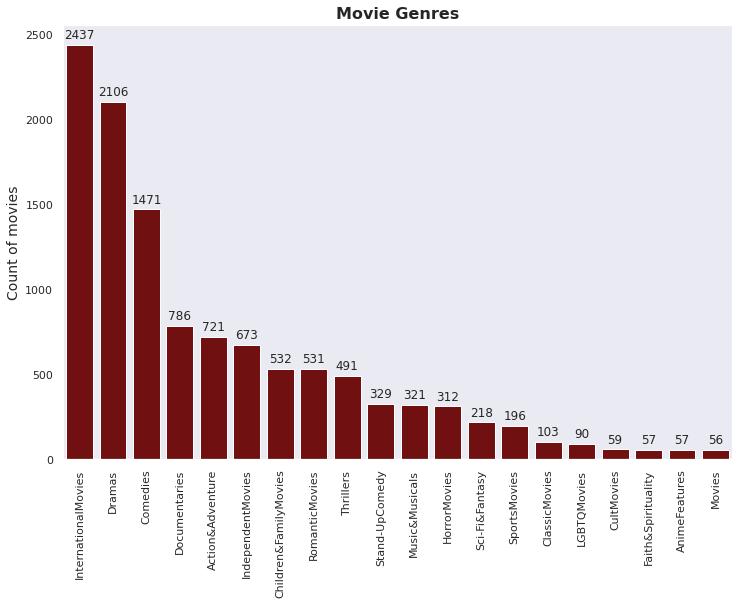

In [53]:
# Importing the Counter
from collections import Counter

# Counting the genres for the movies
genres=list(df_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)


g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(g.keys())
y=list(g.values())
ax=sns.barplot(x,y, color='maroon')

# set a title
plt.title("Movie Genres", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')  

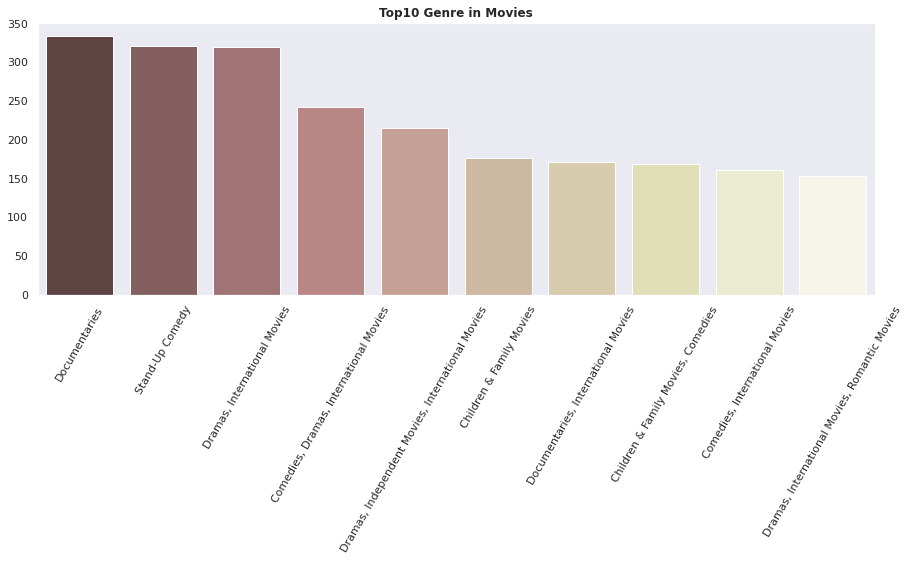

In [54]:
# Top 10 genres without using the Counter 
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()    

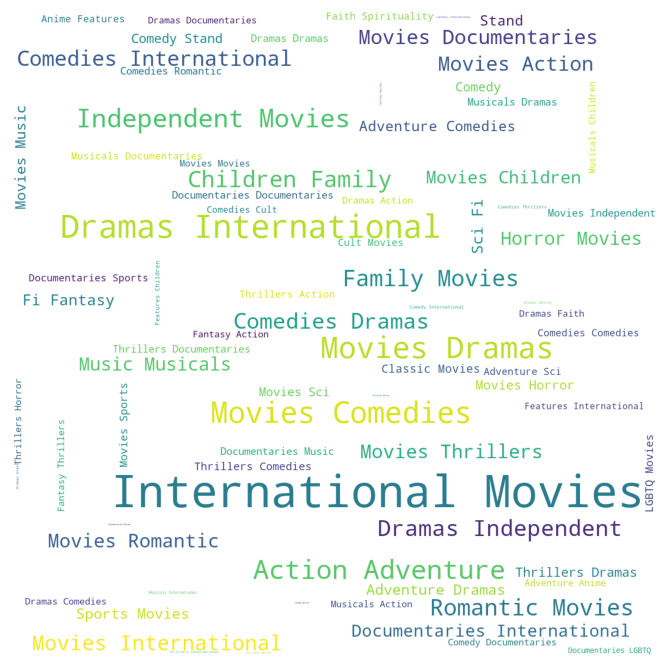

In [55]:
#Wordcloud for the same
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Analysis of Tv Show Genres

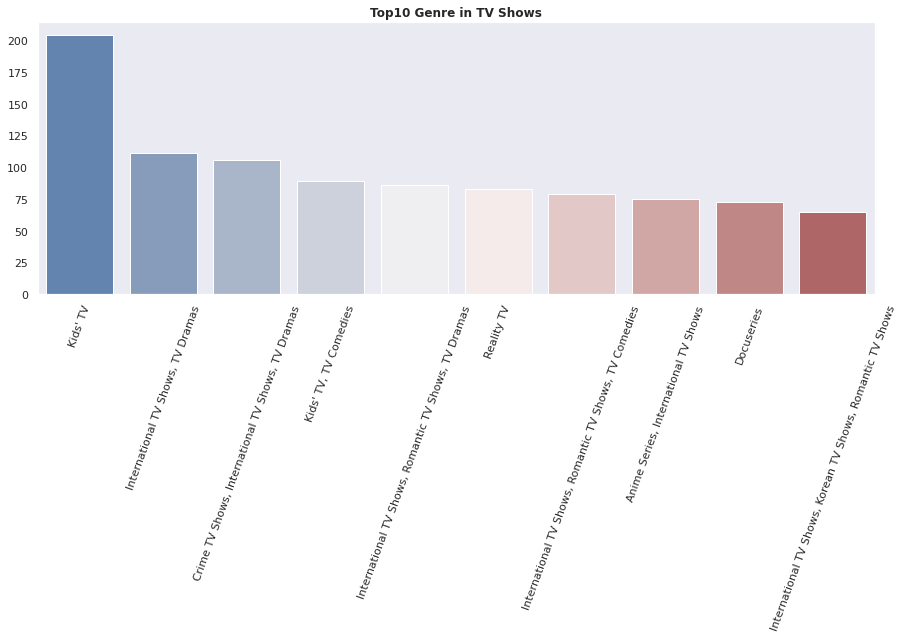

In [56]:
# Top 10 genres without using the Counter
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

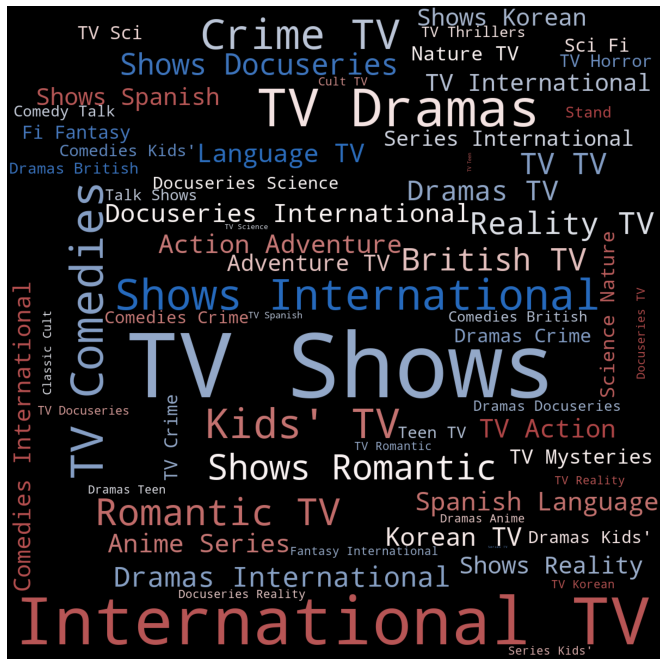

In [57]:
#PLotting on wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Top 10 directors who create the most content


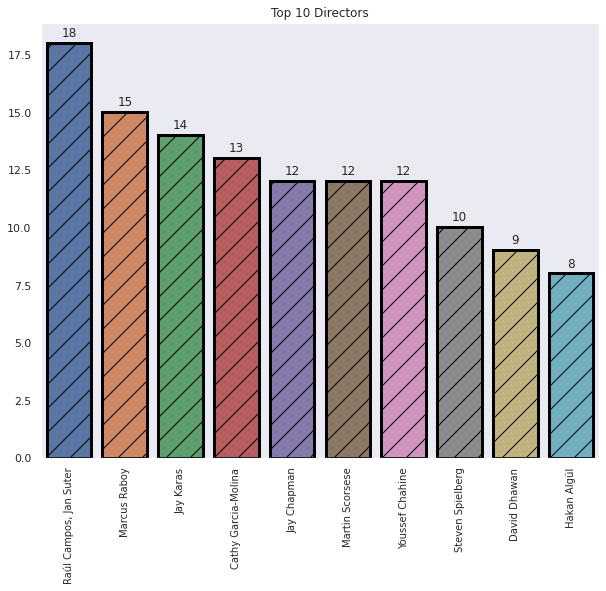

In [58]:
# Top 10 most Productive Movie Directors
plt.figure(figsize=(10,8))
x=df_movies['director'].value_counts().index[1:11]
y=df_movies['director'].value_counts().values[1:11]
ax=sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 Directors')
plt.xticks(rotation = 90, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

Top 10 Actors who appear in the majority of films


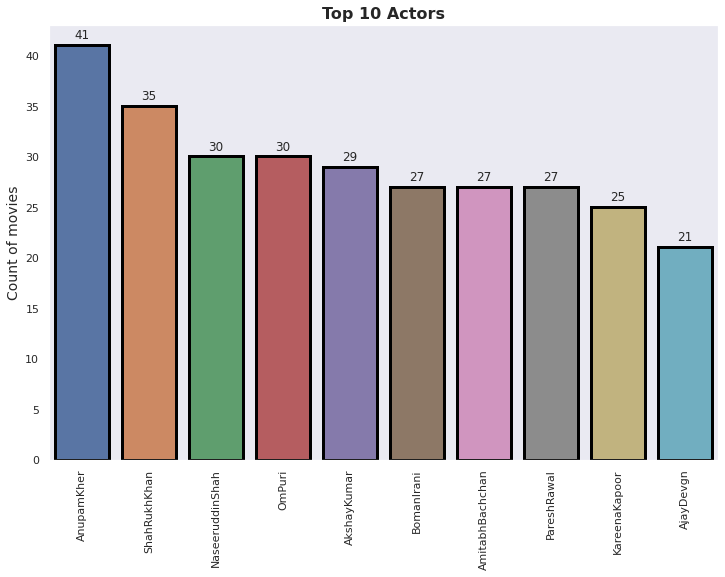

In [59]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(df_movies['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
movie_cast=Counter(cast)


movie_cast={k: v for k, v in sorted(movie_cast.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(movie_cast.keys())
y=list(movie_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

Top 10 Actors who appear in the majority of Tv shows


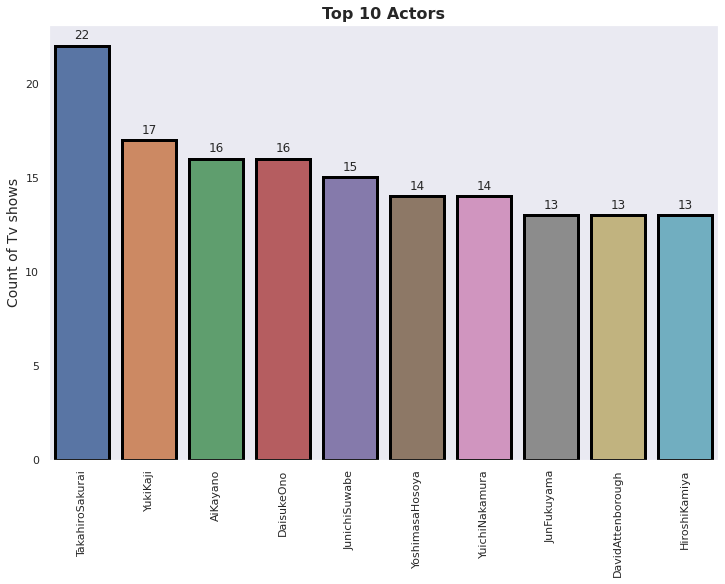

In [60]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(df_tv['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
tv_cast=Counter(cast)


tv_cast={k: v for k, v in sorted(tv_cast.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(tv_cast.keys())
y=list(tv_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of Tv shows",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

In [61]:
df=netflix_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7777 non-null   object
 1   type               7777 non-null   object
 2   title              7777 non-null   object
 3   director           7777 non-null   object
 4   cast               7777 non-null   object
 5   country            7777 non-null   object
 6   release_year       7777 non-null   int64 
 7   rating             7777 non-null   object
 8   duration           7777 non-null   object
 9   listed_in          7777 non-null   object
 10  description        7777 non-null   object
 11  year_added         7777 non-null   int64 
 12  month_added        7777 non-null   int64 
 13  month_name_added   7777 non-null   object
 14  principal_country  7777 non-null   object
 15  age_rating         7777 non-null   object
dtypes: int64(3), object(13)
memory usage: 1.3+

In [62]:
#appending all text column to single text column to work with
df['filtered'] = df['description'] + ' '+ df['listed_in'] + ' ' + df['rating'] + ' '+ df['country']+ ' ' + df['cast'] + ' '+ df['director']

In [63]:
df['filtered'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi unknown'

In [64]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            unknown                                            Nasty C   
7785            unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            unknown   

                                                country  release_year rating  \
0                                                Brazil          2020  TV-MA   
1                                                Mexico          2016  TV-MA   
2                                             Singapore          2011      R   
3                                         United States          2009  PG-13   
4                                         United States          2008  PG-13   
...                                                 ...           ...    ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   
7783                                              India          2015  TV-14   
7784                                      United States          2019  TV-MA   
7785                                          Australia          2019  TV-PG   
7786              United Kingdom, Canada, United States          2019  TV-MA   

       duration                                          listed_in  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7782     99 min                       Dramas, International Movies   
7783    111 min     Dramas, International Movies, Music & Musicals   
7784     44 min  Documentaries, International Movies, Music & M...   
7785   1 Season                 International TV Shows, Reality TV   
7786     90 min                    Documentaries, Music & Musicals   

                                            description  year_added  \
0     In a future where the elite inhabit an island ...        2020   
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is found dead, his fellow...        2018   
3     In a postapocalyptic world, rag-doll robots hi...        2017   
4     A brilliant group of students become card-coun...        2020   
...                                            

In [65]:
df['filtered']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: filtered, Length: 7777, dtype: object

Text preproceesing

In [66]:
#text cleaning
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
df['filtered'] = df['filtered'].apply(cleaned)    

In [67]:
# to lower
df['filtered' ]= df['filtered'].str.lower()

In [68]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [70]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [71]:
#final word filter to be applied 
def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string) 
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

df['filtered_new'] = ''
for item, row in df.iterrows():
    df.at[item, 'filtered_new'] = wordfilter(row['filtered'], stop_words)
    
df['filtered_new']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: filtered_new, Length: 7777, dtype: object

In [72]:
#join words fun
def join_words(x):
  return " ".join(x)  

In [73]:
#final column
df['filtered_new'] = df['filtered_new'].apply(join_words) 

In [74]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            unknown                                            Nasty C   
7785            unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            unknown   

                                                country  release_year rating  \
0                                                Brazil          2020  TV-MA   
1                                                Mexico          2016  TV-MA   
2                                             Singapore          2011      R   
3                                         United States          2009  PG-13   
4                                         United States          2008  PG-13   
...                                                 ...           ...    ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   
7783                                              India          2015  TV-14   
7784                                      United States          2019  TV-MA   
7785                                          Australia          2019  TV-PG   
7786              United Kingdom, Canada, United States          2019  TV-MA   

       duration                                          listed_in  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7782     99 min                       Dramas, International Movies   
7783    111 min     Dramas, International Movies, Music & Musicals   
7784     44 min  Documentaries, International Movies, Music & M...   
7785   1 Season                 International TV Shows, Reality TV   
7786     90 min                    Documentaries, Music & Musicals   

                                            description  year_added  \
0     In a future where the elite inhabit an island ...        2020   
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is found dead, his fellow...        2018   
3     In a postapocalyptic world, rag-doll robots hi...        2017   
4     A brilliant group of students become card-coun...        2020   
...                                            

In [75]:
words = df.filtered_new

**TFIDF Vectorization**

In [76]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)
     

In [77]:
X .shape  

(7777, 15000)

PCA for Dimensionality Reduction

In [78]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

Text(0, 0.5, 'cumulative explained variance')

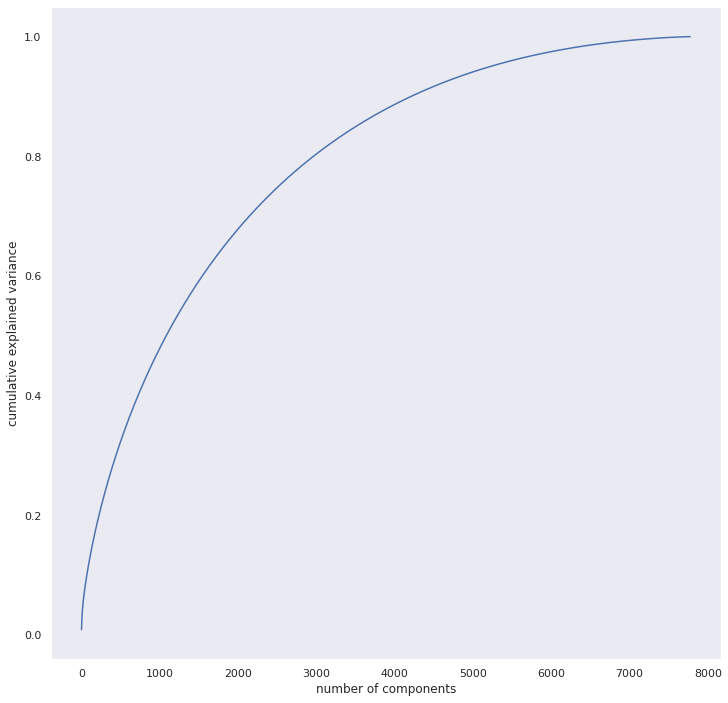

In [79]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

80% of variance explained with 3000 components

In [80]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(7777, 3000)

In [83]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [84]:
#applying pca
X= transformer.transform(X_vectorized.toarray())   

In [89]:
X    

array([[-0.04681061,  0.10057616,  0.02618071, ...,  0.01596822,
        -0.01447909, -0.0092654 ],
       [ 0.10780575, -0.04158106, -0.00994504, ..., -0.01791513,
         0.00082612, -0.00538427],
       [ 0.14791818, -0.01360687, -0.04642244, ...,  0.00314264,
         0.00600185, -0.00264883],
       ...,
       [-0.06364223,  0.01936131, -0.03585616, ..., -0.01725411,
         0.00351087, -0.00547459],
       [-0.08419038,  0.02363985, -0.0818075 , ..., -0.01825855,
        -0.00881162, -0.00320706],
       [-0.05762511, -0.04734987,  0.20535728, ...,  0.00905882,
         0.00770516,  0.00309946]])

K Means Clustering

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff662bea610>,
                 estimator=KMeans(n_clusters=21), k=(4, 22),
                 metric='silhouette', timings=False)

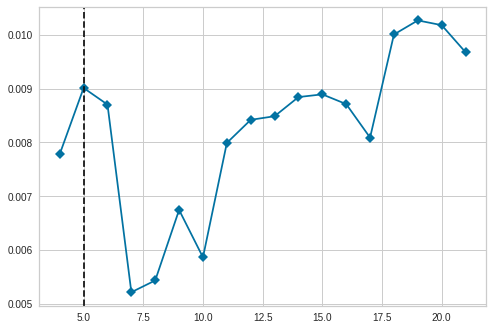

In [91]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)   

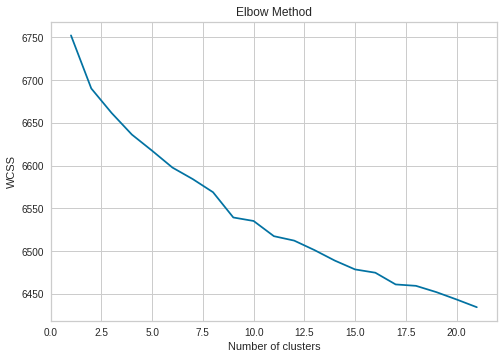

In [92]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Lets select optimal value of K as 9

Labelling the dataset as per the cluster


In [143]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=9, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(n_clusters=9, n_init=1)

In [144]:
from sklearn.metrics import silhouette_score

In [145]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.008


In [146]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

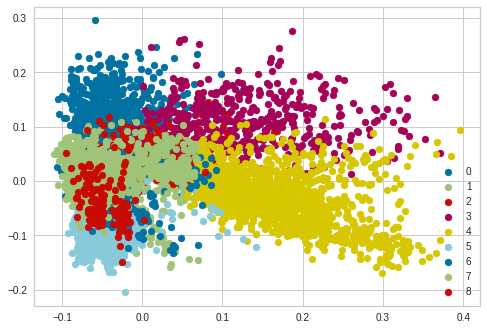

In [147]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

Labelling the dataset as per the cluster


In [149]:
# kmeans label to cluster column
df['cluster'] = kmeans.labels_

In [150]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          unknown   
4         s5  TV Show           Kota Factory          unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                               unknown  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            unknown  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  year_added  \
0     As her father nears the end of his life, filmm...        2021   
1     After crossing paths at a party, a Cape Town t...        2021   
2     To protect his family from a powerful drug lor...        2021   
3     Feuds, flirtations and toilet talk go down amo...        2021   
4     In a city of coaching centers known to train I...        2021   
...                                                 ...         ...   
8802  A political cartoonist, a crime reporter and a...        2019   
8803  While living alone in a spooky town, a young g...        2019   
8804  Looking to survive in a world taken over by zo...        2019   
8805  Dragged from civilian life, a former superhero...        2020   
8806  A scrappy but poor boy worms his way into a ty...        2019   

      month_added month_name_added principal_country    age_rating  \
0               9        September     United States         Teens   
1               9        September      South Africa        Adults   
2               9        September     United States        Adults   
3           

In [151]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [152]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Word Cloud on Description col for different cluster

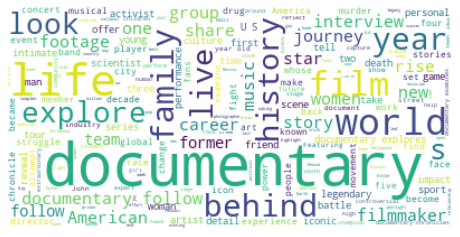

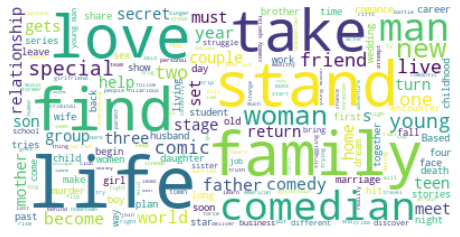

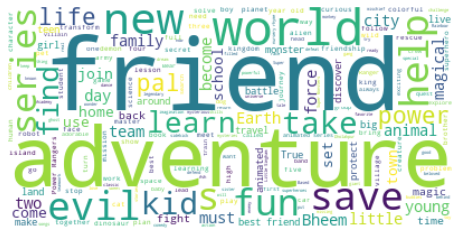

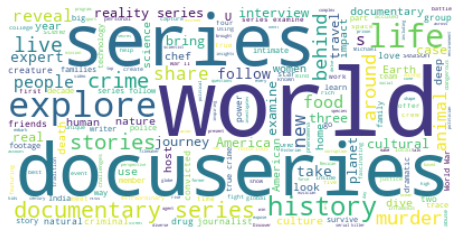

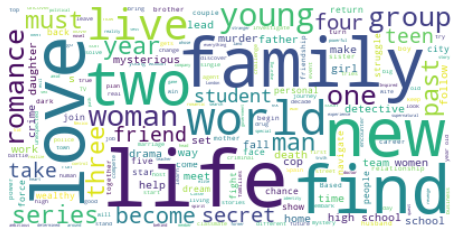

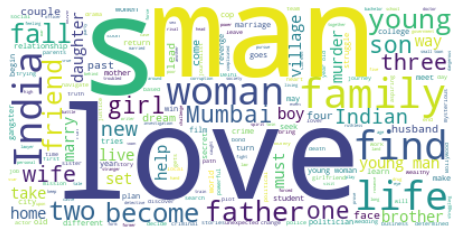

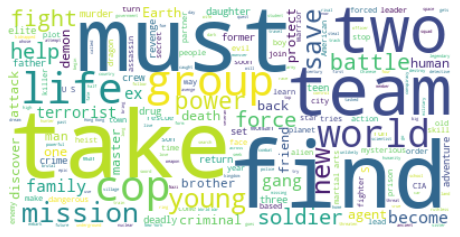

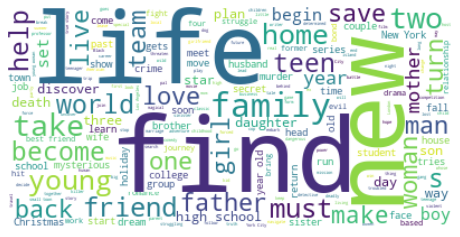

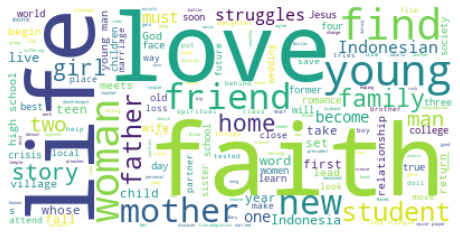

In [153]:
for i in range(9):
  func_select_Category(i,'description')

Word Cloud on Cast col for different cluster

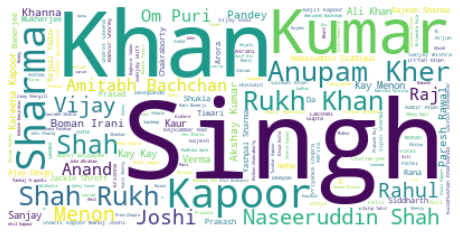

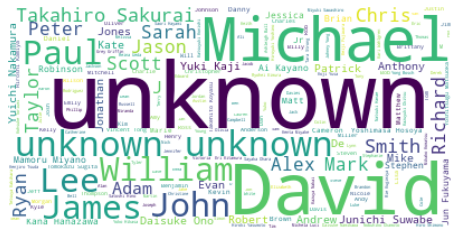

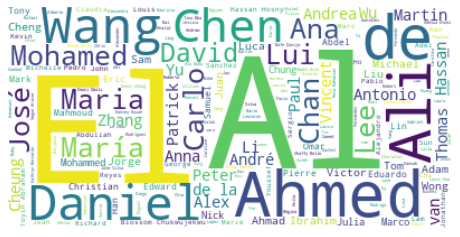

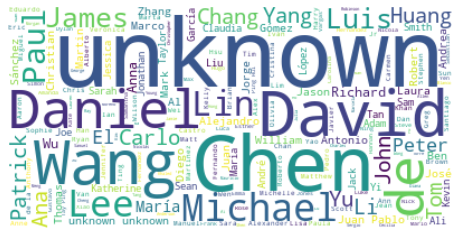

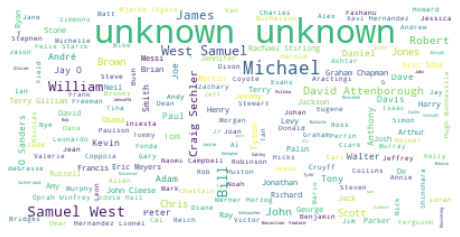

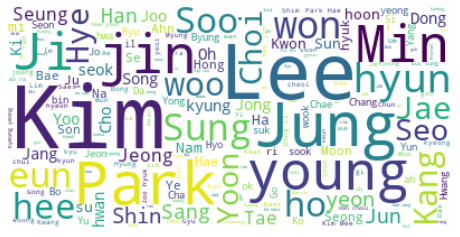

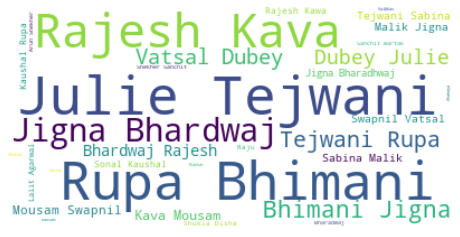

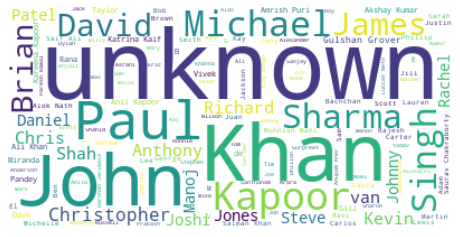

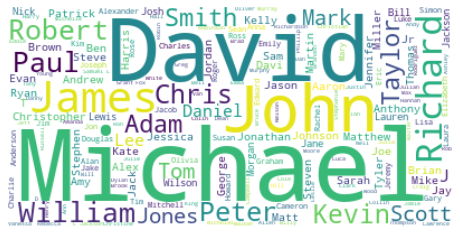

In [103]:
for i in range(9):
  func_select_Category(i,'cast')

Word Cloud on director col for different cluster

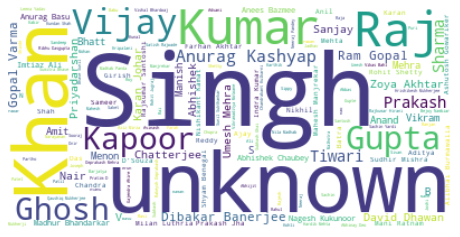

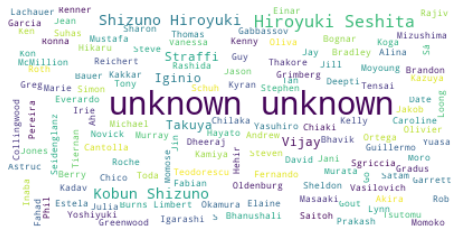

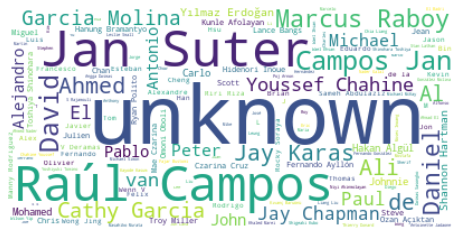

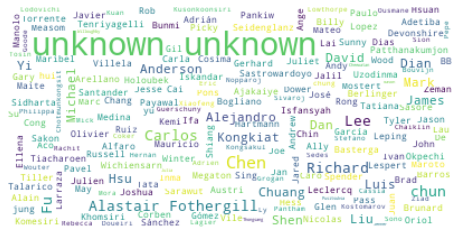

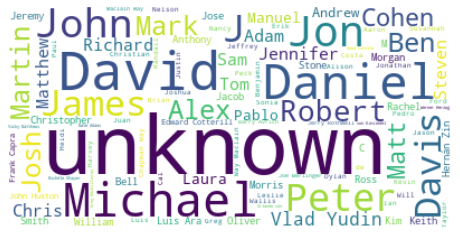

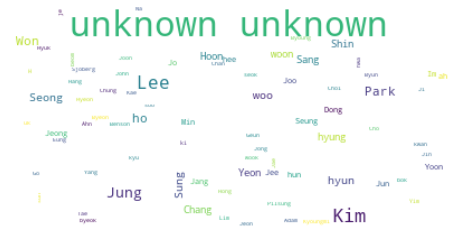

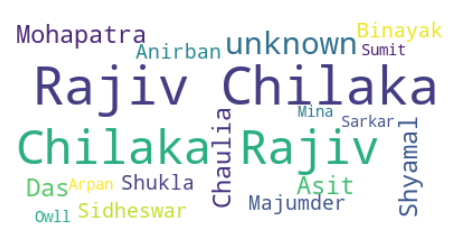

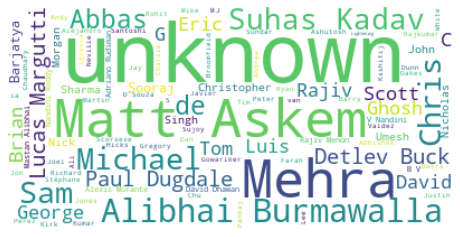

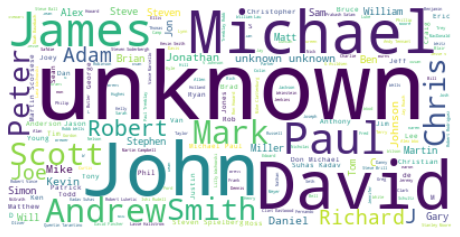

In [104]:
for i in range(9):
  func_select_Category(i,'director')

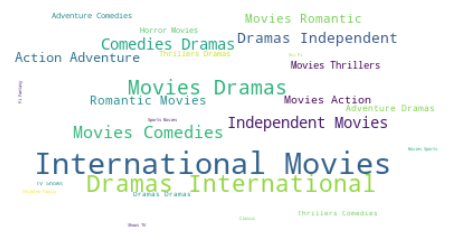

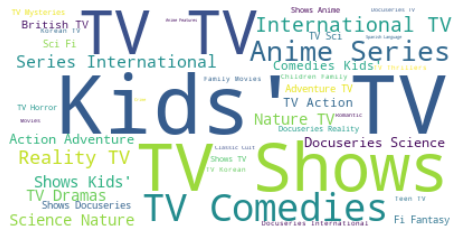

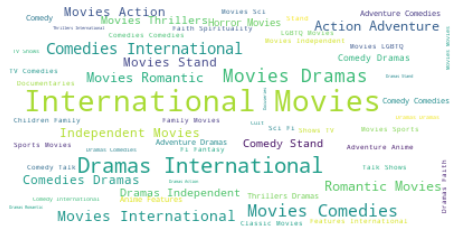

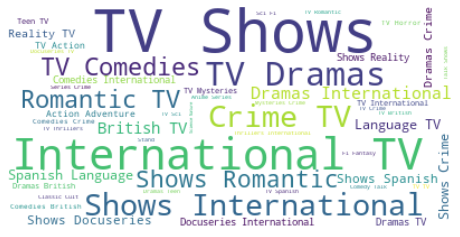

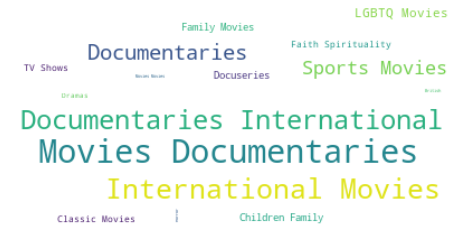

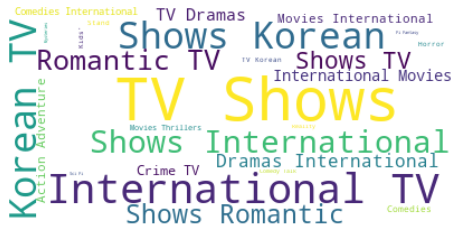

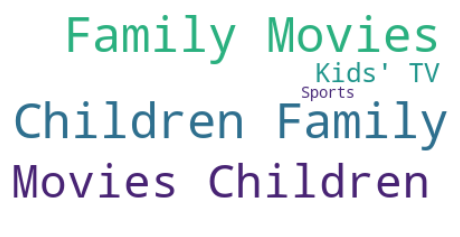

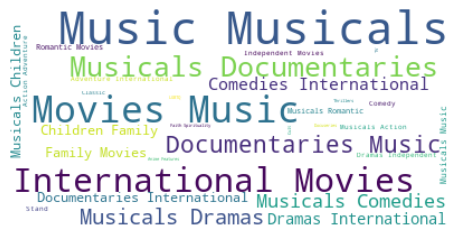

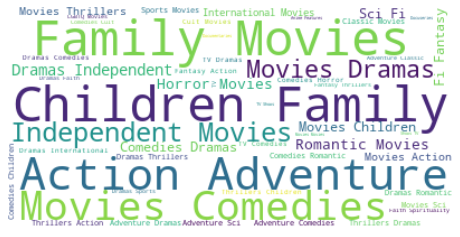

In [114]:
for i in range(9):
  func_select_Category(i,'listed_in')

cluster0-International dramas,movie action,movie trillers


In [105]:
df[df['cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']]

type                  title  \
4     TV Show           Kota Factory   
24      Movie                  Jeans   
30      Movie        Ankahi Kahaniya   
50    TV Show          Dharmakshetra   
105     Movie       Angamaly Diaries   
...       ...                    ...   
8772    Movie  Yamla Pagla Deewana 2   
8773    Movie    Yanda Kartavya Aahe   
8775  TV Show        Yeh Meri Family   
8798    Movie               Zed Plus   
8799    Movie                  Zenda   

                                               director  \
4                                               unknown   
24                                           S. Shankar   
30    Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...   
50                                              unknown   
105                                Lijo Jose Pellissery   
...                                                 ...   
8772                                     Sangeeth Sivan   
8773                                       Kedar Shinde   
8775                                            unknown   
8798                            Chandra Prakash Dwivedi   
8799                                     Avadhoot Gupte   

                                                   cast        country rating  \
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India  TV-MA   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...          India  TV-14   
30    Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...  United States  TV-14   
50    Kashmira Irani, Chandan Anand, Dinesh Mehta, A...          India  TV-PG   
105   Antony Varghese, Reshma Rajan, Binny Rinky Ben...          India  TV-14   
...                                                 ...            ...    ...   
8772  Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...          India  TV-14   
8773  Ankush Choudhary, Smita Shewale, Mohan Joshi, ...          India  TV-PG   
8775  Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...          India  TV-PG   
8798  Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...          India  TV-MA   
8799  Santosh Juvekar, Siddharth Chandekar, Sachit P...          India  TV-14   

                                              listed_in  \
4     International TV Shows, Romantic TV Shows, TV ...   
24      Comedies, International Movies, Romantic Movies   
30     Dramas, Independent Movies, International Movies   
50    International TV Shows, TV Dramas, TV Sci-Fi &...   
105                Action & Adventure, Comedies, Dramas   
...                                                 ...   
8772  Action & Adventure, Comedies, International Mo...   
8773             Comedies, Dramas, International Movies   
8775                International TV Shows, TV Comedies   
8798             Comedies, Dramas, International Movies   
8799                       Dramas, International Movies   

                                            description  
4     In a city of coaching centers known to train I...  
24    When the father of the man she loves insists t...  
30    As big city life buzzes around them, lonely so...  
50    After the ancient Great War, the god Chitragup...  
105   After growing up amidst the gang wars of his h...  
...                                                 ...  
8772  Up to his old tricks, con man Dharam poses as ...  
8773  Thanks to an arranged marriage that was design...  
8775  In the summer of 1998, middle child Harshu bal...  
8798  A philandering small-town mechanic's political...  
8799  A change in the leadership of a political part...  

[863 rows x 8 columns]

cluster1-kids tv,anime,animation

In [106]:
df[df['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]

type                                   title director  \
3     TV Show                   Jailbirds New Orleans  unknown   
15    TV Show                       Dear White People  unknown   
34    TV Show                 Tayo and Little Wizards  unknown   
37    TV Show                             Angry Birds  unknown   
40    TV Show  He-Man and the Masters of the Universe  unknown   
...       ...                                     ...      ...   
8783  TV Show                                    Yoko  unknown   
8785  TV Show                                     YOM  unknown   
8795  TV Show                         Yu-Gi-Oh! Arc-V  unknown   
8797  TV Show                               Zak Storm  unknown   
8803  TV Show                             Zombie Dumb  unknown   

                                                   cast  \
3                                               unknown   
15    Logan Browning, Brandon P. Bell, DeRon Horton,...   
34    Dami Lee, Jason Lee, Bommie Catherine Han, Jen...   
37    Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...   
40    Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...   
...                                                 ...   
8783  Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...   
8785  Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8803                                            unknown   

                                            country rating  \
3                                     United States  TV-MA   
15                                    United States  TV-MA   
34                                    United States  TV-Y7   
37                                          Finland  TV-Y7   
40                                    United States  TV-Y7   
...                                             ...    ...   
8783                                  United States   TV-Y   
8785                                  United States  TV-Y7   
8795                                  Japan, Canada  TV-Y7   
8797  United States, France, South Korea, Indonesia  TV-Y7   
8803                                  United States  TV-Y7   

                                   listed_in  \
3                     Docuseries, Reality TV   
15                    TV Comedies, TV Dramas   
34                                  Kids' TV   
37                     Kids' TV, TV Comedies   
40             Kids' TV, TV Sci-Fi & Fantasy   
...                                      ...   
8783                                Kids' TV   
8785                                Kids' TV   
8795                  Anime Series, Kids' TV   
8797                                Kids' TV   
8803  Kids' TV, Korean TV Shows, TV Comedies   

                                            description  
3     Feuds, flirtations and toilet talk go down amo...  
15    Students of color navigate the daily slights a...  
34    Tayo speeds into an adventure when his friends...  
37    Birds Red, Chuck and their feathered friends h...  
40    Mighty teen Adam and his heroic squad of misfi...  
...                                                 ...  
8783  Friends Mai, Oto and Vik's games at the park b...  
8785  With the mind of a human being, and the body o...  
8795  Now that he's discovered the Pendulum Summonin...  
8797  Teen surfer Zak Storm is mysteriously transpor...  
8803  While living alone in a spooky town, a young g...  

[1023 rows x 8 columns]

cluster2-dramas,internatinal movies

In [107]:
df[df['cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']]

type                           title             director  \
7     Movie                         Sankofa         Haile Gerima   
12    Movie                    Je Suis Karl  Christian Schwochow   
22    Movie                 Avvai Shanmughi       K.S. Ravikumar   
35    Movie  The Father Who Moves Mountains         Daniel Sandu   
36    Movie                  The Stronghold       Cédric Jimenez   
...     ...                             ...                  ...   
8788  Movie                    You Carry Me           Ivona Juka   
8789  Movie             You Changed My Life  Cathy Garcia-Molina   
8792  Movie                     Young Tiger               Mu Chu   
8794  Movie                          اشتباك         Mohamed Diab   
8801  Movie                         Zinzana      Majid Al Ansari   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
22    Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...   
35    Adrian Titieni, Elena Purea, Judith State, Val...   
36    Gilles Lellouche, Karim Leklou, François Civil...   
...                                                 ...   
8788  Lana Baric, Vojislav Brajovic, Natasa Janjic, ...   
8789  John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...   
8792  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...   
8794  Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   

                                                country rating  \
7     United States, Ghana, Burkina Faso, United Kin...  TV-MA   
12                              Germany, Czech Republic  TV-MA   
22                                        United States  TV-PG   
35                                        United States  TV-MA   
36                                        United States  TV-MA   
...                                                 ...    ...   
8788              Croatia, Slovenia, Serbia, Montenegro  TV-MA   
8789                                        Philippines  TV-PG   
8792                                          Hong Kong     NR   
8794                                      Egypt, France  TV-14   
8801                       United Arab Emirates, Jordan  TV-MA   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
12                        Dramas, International Movies   
22                      Comedies, International Movies   
35             Dramas, International Movies, Thrillers   
36    Action & Adventure, Dramas, International Movies   
...                                                ...   
8788                      Dramas, International Movies   
8789            Comedies, Dramas, International Movies   
8792          Action & Adventure, International Movies   
8794  Dramas, Independent Movies, International Movies   
8801           Dramas, International Movies, Thrillers   

                                            description  
7     On a photo shoot in Ghana, an American model s...  
12    After most of her family is murdered in a terr...  
22    Newly divorced and denied visitation rights wi...  
35    When his son goes missing during a snowy hike ...  
36    Tired of the small-time grind, three Marseille...  
...                                                 ...  
8788  A soap opera producer, director and makeup art...  
8789  Laida and Miggy think they've found perfect ha...  
8792  Aided only by a tough female police officer, a...  
8794  Amid the tumult following Egyptian President M...  
8801  Recovering alcoholic Talal wakes up inside a s...  

[1898 rows x 8 columns]

cluster3-all types of tv shows crime,drama etc

In [108]:
df[df['cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']]

type                                title           director  \
1     TV Show                        Blood & Water            unknown   
2     TV Show                            Ganglands    Julien Leclercq   
8     TV Show        The Great British Baking Show    Andy Devonshire   
10    TV Show  Vendetta: Truth, Lies and The Mafia            unknown   
11    TV Show                     Bangkok Breaking  Kongkiat Komesiri   
...       ...                                  ...                ...   
8749  TV Show                           Winter Sun            unknown   
8755  TV Show                    Women Behind Bars            unknown   
8758  TV Show               World's Busiest Cities            unknown   
8796  TV Show                           Yunus Emre            unknown   
8800  TV Show                   Zindagi Gulzar Hai            unknown   

                                                   cast         country  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...    South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   United States   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
10                                              unknown   United States   
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...   United States   
...                                                 ...             ...   
8749  Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...          Turkey   
8755                                            unknown   United States   
8758                 Anita Rani, Ade Adepitan, Dan Snow  United Kingdom   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...          Turkey   
8800  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...        Pakistan   

     rating                                          listed_in  \
1     TV-MA    International TV Shows, TV Dramas, TV Mysteries   
2     TV-MA  Crime TV Shows, International TV Shows, TV Act...   
8     TV-14                       British TV Shows, Reality TV   
10    TV-MA  Crime TV Shows, Docuseries, International TV S...   
11    TV-MA  Crime TV Shows, International TV Shows, TV Act...   
...     ...                                                ...   
8749  TV-MA    International TV Shows, TV Dramas, TV Thrillers   
8755  TV-14                         Crime TV Shows, Docuseries   
8758  TV-PG                       British TV Shows, Docuseries   
8796  TV-PG                  International TV Shows, TV Dramas   
8800  TV-PG  International TV Shows, Romantic TV Shows, TV ...   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
8     A talented batch of amateur bakers face off in...  
10    Sicily boasts a bold "Anti-Mafia" coalition. B...  
11    Struggling to earn a living in Bangkok, a man ...  
...                                                 ...  
8749  Years after ruthless businessmen kill his fath...  
8755  This reality series recounts true stories of w...  
8758  From Moscow to Mexico City, three BBC journali...  
8796  During the Mongol invasions, Yunus Emre leaves...  
8800  Strong-willed, middle-class Kashaf and carefre...  

[1294 rows x 8 columns]

cluster4-documentaries,international movies

In [109]:
df[df['cluster'] == 4][['type','title','director','cast','country','rating','listed_in','description']]

type                                              title  \
0     Movie                               Dick Johnson Is Dead   
16    Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
45    Movie                             My Heroes Were Cowboys   
68    Movie                                         Schumacher   
88    Movie           Blood Brothers: Malcolm X & Muhammad Ali   
...     ...                                                ...   
8738  Movie                                           Why Knot   
8739  Movie                 Why We Fight: The Battle of Russia   
8744  Movie                                           Williams   
8746  Movie                                             Winnie   
8763  Movie                    WWII: Report from the Aleutians   

                                               director  \
0                                       Kirsten Johnson   
16        Pedro de Echave García, Pablo Azorín Williams   
45                                          Tyler Greco   
68    Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...   
88                                        Marcus Clarke   
...                                                 ...   
8738                                       Dhruv Dhawan   
8739                        Frank Capra, Anatole Litvak   
8744                                    Morgan Matthews   
8746                                     Pascale Lamche   
8763                                        John Huston   

                         cast  \
0                     unknown   
16                    unknown   
45                    unknown   
68         Michael Schumacher   
88    Malcolm X, Muhammad Ali   
...                       ...   
8738                  unknown   
8739                  unknown   
8744                  unknown   
8746                  unknown   
8763                  unknown   

                                                country rating  \
0                                         United States  PG-13   
16                                        United States  TV-MA   
45                                        United States     PG   
68                                        United States  TV-14   
88                                        United States  PG-13   
...                                                 ...    ...   
8738  Canada, India, Thailand, United States, United...  TV-MA   
8739                                      United States  TV-PG   
8744                                     United Kingdom  TV-MA   
8746         France, Netherlands, South Africa, Finland  TV-14   
8763                                      United States  TV-PG   

                                              listed_in  \
0                                         Documentaries   
16                  Documentaries, International Movies   
45                                        Documentaries   
68    Documentaries, International Movies, Sports Mo...   
88                         Documentaries, Sports Movies   
...                                                 ...   
8738                                      Documentaries   
8739                                      Documentaries   
8744  Documentaries, International Movies, Sports Mo...   
8746                Documentaries, International Movies   
8763                                      Documentaries   

                                            description  
0     As her father nears the end of his life, filmm...  
16    Declassified documents reveal the post-WWII li...  
45    Robin Wiltshire's painful childhood was rescue...  
68    Through exclusive interviews and archival foot...  
88    From a chance meeting to a tragic fallout, Mal...  
...                                                 ...  
8738  Pressured by his traditional family to marry, ...  
8739  This installment of Frank Capra's acclaimed do...  
8744  This inspiring documentary charts the birth of...  
8746  Winnie Mandela speak

cluster5-romantic korean tvshows

In [110]:
df[df['cluster'] == 5][['type','title','director','cast','country','rating','listed_in','description']]

type                   title       director  \
33    TV Show              Squid Game        unknown   
121   TV Show          Hotel Del Luna        unknown   
186   TV Show    Hometown Cha-Cha-Cha        unknown   
193   TV Show                    D.P.        unknown   
289   TV Show       The Crowned Clown        unknown   
...       ...                     ...            ...   
8463    Movie  The President's Barber  Chan-sang Lim   
8467    Movie              The Prison       Na Hyeon   
8575  TV Show         This Is My Love        unknown   
8613    Movie          Train to Busan   Sang-ho Yeon   
8684  TV Show                 Vroomiz        unknown   

                                                   cast        country rating  \
33    Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...  United States  TV-MA   
121   Lee Ji-eun, Yeo Jin-goo, Shin Jung-geun, Seo Y...  United States  TV-14   
186   Shin Min-a, Kim Seon-ho, Lee Sang-yi, Gong Min...  United States  TV-14   
193   Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...  , South Korea  TV-MA   
289   Yeo Jin-goo, Lee Se-young, Kim Sang-kyung, Jun...    South Korea  TV-14   
...                                                 ...            ...    ...   
8463  Kang-ho Song, So-ri Moon, Jae-eung Lee, Yeong-...    South Korea  TV-MA   
8467  Suk-kyu Han, Rae-won Kim, Kyeong-yeong Lee, Wo...    South Korea  TV-MA   
8575  Jin-mo Joo, Sa-rang Kim, Junior, Ja-in Lee, Su...    South Korea  TV-14   
8613  Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...    South Korea  TV-MA   
8684  Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...    South Korea   TV-Y   

                                              listed_in  \
33      International TV Shows, TV Dramas, TV Thrillers   
121   International TV Shows, Romantic TV Shows, TV ...   
186   International TV Shows, Romantic TV Shows, TV ...   
193                   International TV Shows, TV Dramas   
289   International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8463             Comedies, Dramas, International Movies   
8467   Action & Adventure, Dramas, International Movies   
8575  International TV Shows, Korean TV Shows, Roman...   
8613  Action & Adventure, Horror Movies, Internation...   
8684                          Kids' TV, Korean TV Shows   

                                            description  
33    Hundreds of cash-strapped players accept a str...  
121   When he's invited to manage a hotel for dead s...  
186   A big-city dentist opens up a practice in a cl...  
193   A young private’s assignment to capture army d...  
289   Standing in for an unhinged Joseon king, a loo...  
...                                                 ...  
8463  The personal barber to the president, as well ...  
8467  A cop-turned-convict discovers a crime syndica...  
8575  A renowned actor who is still pining over the ...  
8613  As a zombie outbreak sweeps the country, a dad...  
8684  For these half-car, half-animal friends, each ...  

[211 rows x 8 columns]

cluster6-children,family movies

In [111]:
df[df['cluster'] == 6][['type','title','director','cast','country','rating','listed_in','description']]

type                                              title  \
39    TV Show                                       Chhota Bheem   
89    TV Show                                        Mighty Raju   
405     Movie                      Chhota Bheem - Dinosaur World   
406     Movie                       Chhota Bheem - Neeli Pahaadi   
407     Movie                              Chhota Bheem & Ganesh   
408     Movie                 Chhota Bheem & Krishna: Mayanagari   
409     Movie  Chhota Bheem & Krishna: Pataliputra- City of t...   
410     Movie                 Chhota Bheem And The Broken Amulet   
411     Movie             Chhota Bheem And The Crown of Valhalla   
412     Movie               Chhota Bheem and the Incan Adventure   
413     Movie                Chhota Bheem and The ShiNobi Secret   
414     Movie                           Chhota Bheem Aur Hanuman   
415     Movie                           Chhota Bheem aur Krishna   
416     Movie                Chhota Bheem aur Krishna vs Zimbara   
417     Movie                     Chhota Bheem in African Safari   
418     Movie                      Chhota Bheem Ka Roosi Romanch   
419     Movie                      Chhota Bheem: Bheem vs Aliens   
420     Movie               Chhota Bheem: Dholakpur to Kathmandu   
421     Movie                           Chhota Bheem: Dus Pe Dus   
422     Movie                     Chhota Bheem: Journey to Petra   
423     Movie                    Chhota Bheem: Master of Shaolin   
424     Movie                  Chhota Bheem: The Rise of Kirmada   
2717    Movie              Chhota Bheem and the Curse of Damyaan   
3056  TV Show                Chhota Bheem Kung Fu Dhamaka Series   
6173    Movie                             Antariksha Ke Rakhwale   
6461    Movie                       Chhota Bheem Aur Kaala Yodha   
6462    Movie                   Chhota Bheem Ka Romani Adventure   
6463    Movie                    Chhota Bheem Ka Troll Se Takkar   
6464    Movie                        Chhota Bheem Kungfu Dhamaka   
7235  TV Show                                     Krishna Balram   
7929    Movie                                    Samudri Lootere   
8121  TV Show                                        Super Bheem   
8122    Movie                         Super Bheem Bana Vajraveer   

                              director  \
39                             unknown   
89                             unknown   
405                   Sidheswar Shukla   
406                      Rajiv Chilaka   
407                      Rajiv Chilaka   
408                      Rajiv Chilaka   
409                      Rajiv Chilaka   
410                      Rajiv Chilaka   
411                      Rajiv Chilaka   
412                      Rajiv Chilaka   
413                      Rajiv Chilaka   
414                      Rajiv Chilaka   
415                      Rajiv Chilaka   
416                      Rajiv Chilaka   
417                        Binayak Das   
418      Arpan Sarkar, Shyamal Chaulia   
419                      Rajiv Chilaka   
420                      Rajiv Chilaka   
421           Rajiv Chilaka, Owll Mina   
422                      Rajiv Chilaka   
423                      Rajiv Chilaka   
424                      Rajiv Chilaka   
2717                     Rajiv Chilaka   
3056                           unknown   
6173                  Anirban Majumder   
6461  Sidheswar Shukla, Asit Mohapatra   
6462   Asit Mohapatra, Shyamal Chaulia   
6463   Shyamal Chaulia, Asit Mohapatra   
6464        Rajiv Chilaka, Binayak Das   
7235                           unknown   
7929                  Anirban Majumder   
8121                           unknown   
8122                         Sumit Das   

                                                   cast        country rating  \
39    Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...          India  TV-Y7   
89    Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...  United States  TV-Y7   
405   Sonal Kaushal, Rup

clusters7-music &musicals

In [112]:
df[df['cluster'] == 7][['type','title','director','cast','country','rating','listed_in','description']]

type                                              title  \
26    Movie                                     Minsara Kanavu   
96    Movie  If I Leave Here Tomorrow: A Film About Lynyrd ...   
130   Movie                         Barbie Big City Big Dreams   
145   Movie                                      House Party 2   
146   Movie                                      House Party 3   
...     ...                                                ...   
8703  Movie                                We Are Your Friends   
8734  Movie                          Who the F**k Is That Guy?   
8756  Movie                                          Woodstock   
8771  Movie                                   Yaara O Dildaara   
8806  Movie                                             Zubaan   

                          director  \
26                     Rajiv Menon   
96                   Stephen Kijak   
130          Scott Pleydell-Pearce   
145   George Jackson, Doug McHenry   
146                      Eric Meza   
...                            ...   
8703                    Max Joseph   
8734                    Drew Stone   
8756                 Barak Goodman   
8771            Ksshitij Chaudhary   
8806                   Mozez Singh   

                                                   cast  \
26    Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....   
96    Ronnie Van Zandt, Gary Rossington, Allen Colli...   
130   America Young, Amber May, Giselle Fernandez, A...   
145   Christopher Reid, Christopher Martin, Martin L...   
146   Christopher Reid, Christopher Martin, Tisha Ca...   
...                                                 ...   
8703  Zac Efron, Wes Bentley, Emily Ratajkowski, Jon...   
8734                                      Michael Alago   
8756                                            unknown   
8771  Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulza...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                    country rating  \
26                            United States  TV-PG   
96                            United States  TV-MA   
130                           United States   TV-Y   
145                           United States      R   
146                           United States      R   
...                                     ...    ...   
8703  United Kingdom, France, United States      R   
8734                          United States  TV-MA   
8756                          United States  TV-MA   
8771                                  India  TV-14   
8806                                  India  TV-14   

                                             listed_in  \
26    Comedies, International Movies, Music & Musicals   
96                     Documentaries, Music & Musicals   
130         Children & Family Movies, Music & Musicals   
145            Comedies, Cult Movies, Music & Musicals   
146                         Comedies, Music & Musicals   
...                                                ...   
8703      Dramas, Independent Movies, Music & Musicals   
8734     Documentaries, LGBTQ Movies, Music & Musicals   
8756                   Documentaries, Music & Musicals   
8771    Dramas, International Movies, Music & Musicals   
8806    Dramas, International Movies, Music & Musicals   

                                            description  
26    A tangled love triangle ensues when a man fall...  
96    Using interviews and archival footage, this do...  
130   At a summer performing arts program in New Yor...  
145   Kid goes off to college with scholarship money...  
146   After Kid gets engaged, Play plans to throw th...  
...                                                 ...  
8703  An ambitious young DJ who knows how to work a ...  
8734  Take a ride through the life of record exec Mi...  
8756  For the 50th anniversary of the legendary Wood...  
8771  The patriarch of a wealthy family with one ind...  
8806  A scrappy but poor boy worms his way into a ty...  

[378 

cluster8-family movies and action adventures

In [113]:
df[df['cluster'] == 8][['type','title','director','cast','country','rating','listed_in','description']]

type                             title  \
5     TV Show                     Midnight Mass   
6       Movie  My Little Pony: A New Generation   
9       Movie                      The Starling   
13      Movie  Confessions of an Invisible Girl   
18      Movie                         Intrusion   
...       ...                               ...   
8791    Movie                       Young Adult   
8793    Movie              Yours, Mine and Ours   
8802    Movie                            Zodiac   
8804    Movie                        Zombieland   
8805    Movie                              Zoom   

                           director  \
5                     Mike Flanagan   
6     Robert Cullen, José Luis Ucha   
9                    Theodore Melfi   
13                    Bruno Garotti   
18                       Adam Salky   
...                             ...   
8791                  Jason Reitman   
8793                   Raja Gosnell   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   

                                                   cast        country rating  \
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...  United States  TV-MA   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  United States     PG   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...  United States  PG-13   
13    Klara Castanho, Lucca Picon, Júlia Gomes, Marc...  United States  TV-PG   
18    Freida Pinto, Logan Marshall-Green, Robert Joh...  United States  TV-14   
...                                                 ...            ...    ...   
8791  Charlize Theron, Patton Oswalt, Patrick Wilson...  United States      R   
8793  Dennis Quaid, Rene Russo, Sean Faris, Katija P...  United States     PG   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States      R   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States      R   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States     PG   

                                 listed_in  \
5       TV Dramas, TV Horror, TV Mysteries   
6                 Children & Family Movies   
9                         Comedies, Dramas   
13      Children & Family Movies, Comedies   
18                               Thrillers   
...                                    ...   
8791  Comedies, Dramas, Independent Movies   
8793    Children & Family Movies, Comedies   
8802        Cult Movies, Dramas, Thrillers   
8804               Comedies, Horror Movies   
8805    Children & Family Movies, Comedies   

                                            description  
5     The arrival of a charismatic young priest brin...  
6     Equestria's divided. But a bright-eyed hero be...  
9     A woman adjusting to life after a loss contend...  
13    When the clever but socially-awkward Tetê join...  
18    After a deadly home invasion at a couple’s new...  
...                                                 ...  
8791  When a divorced writer gets a letter from an o...  
8793  When a father of eight and a mother of 10 prep...  
8802  A political cartoonist, a crime reporter and a...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  

[2370 rows x 8 columns]

In [131]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

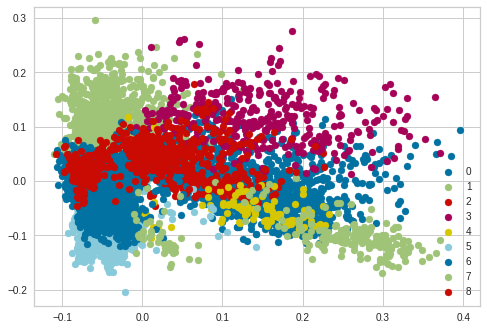

In [132]:
u_labels = np.unique(y_hc)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()